# Attrition in an Organization || Why Workers Quit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/ibm-hr-analytics-attrition-dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [6]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [7]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

# 2. Data Visualisation

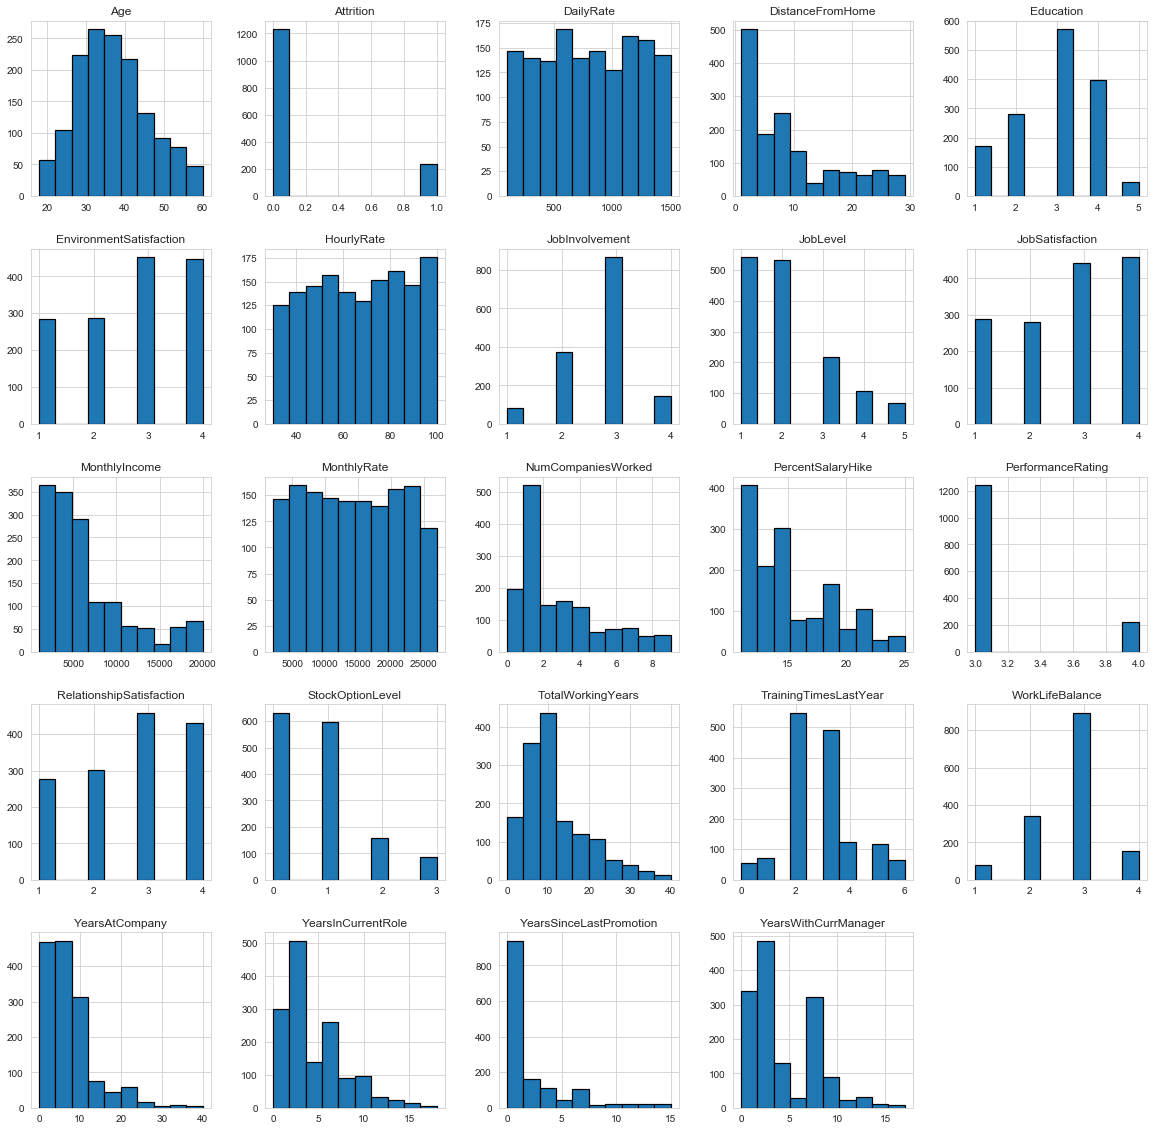

In [8]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

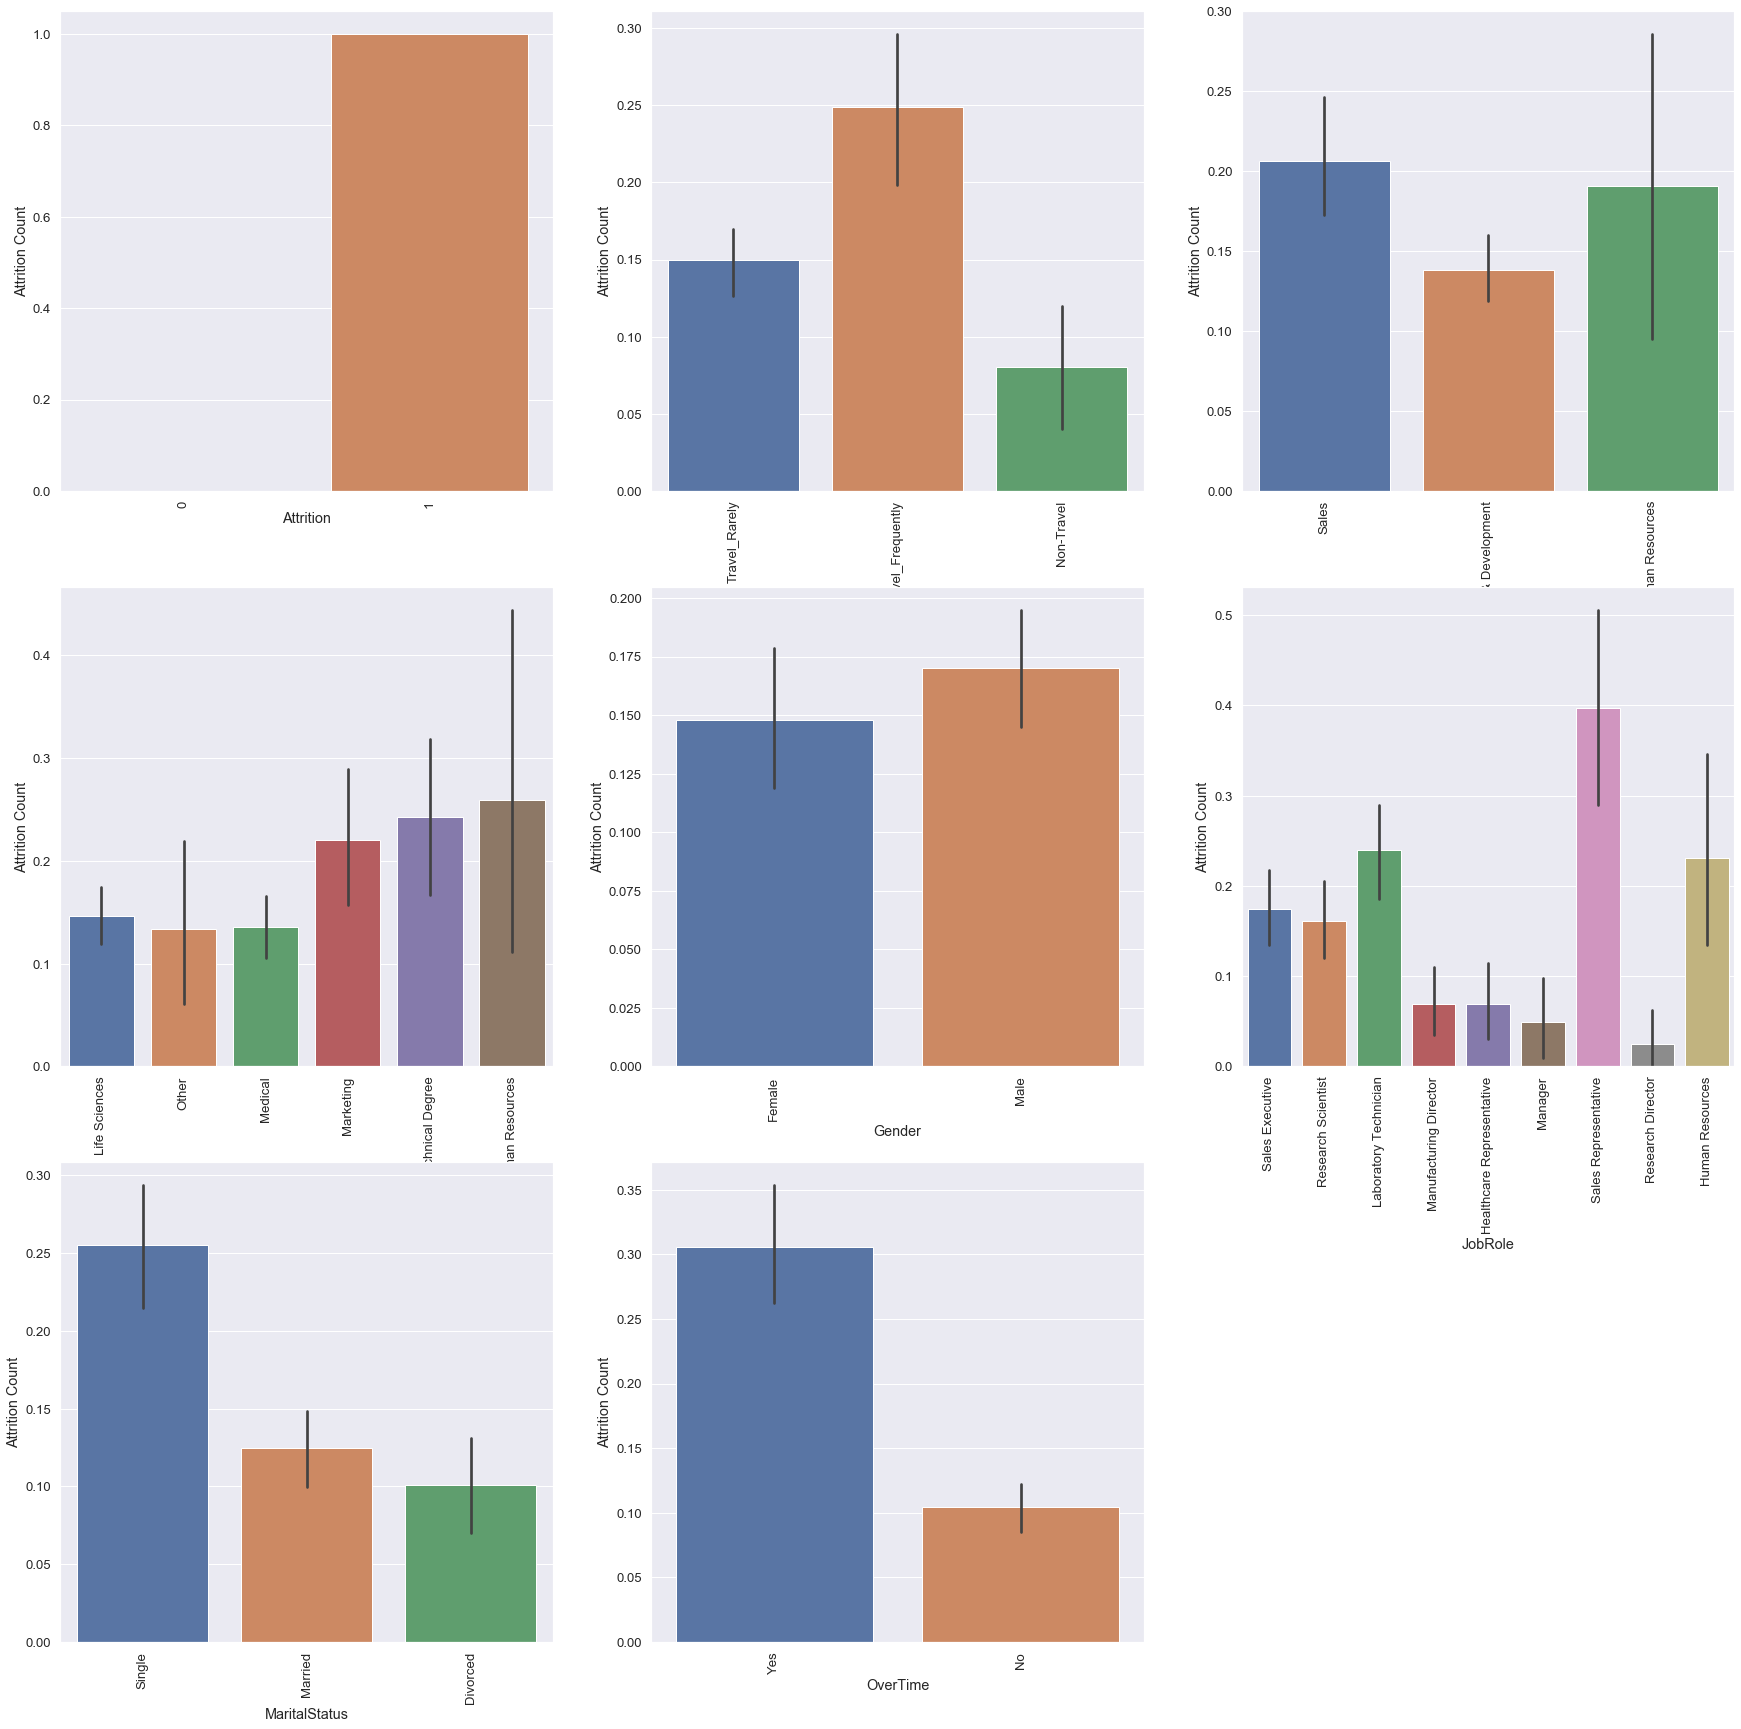

In [9]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

# 3. Correlation Matrix

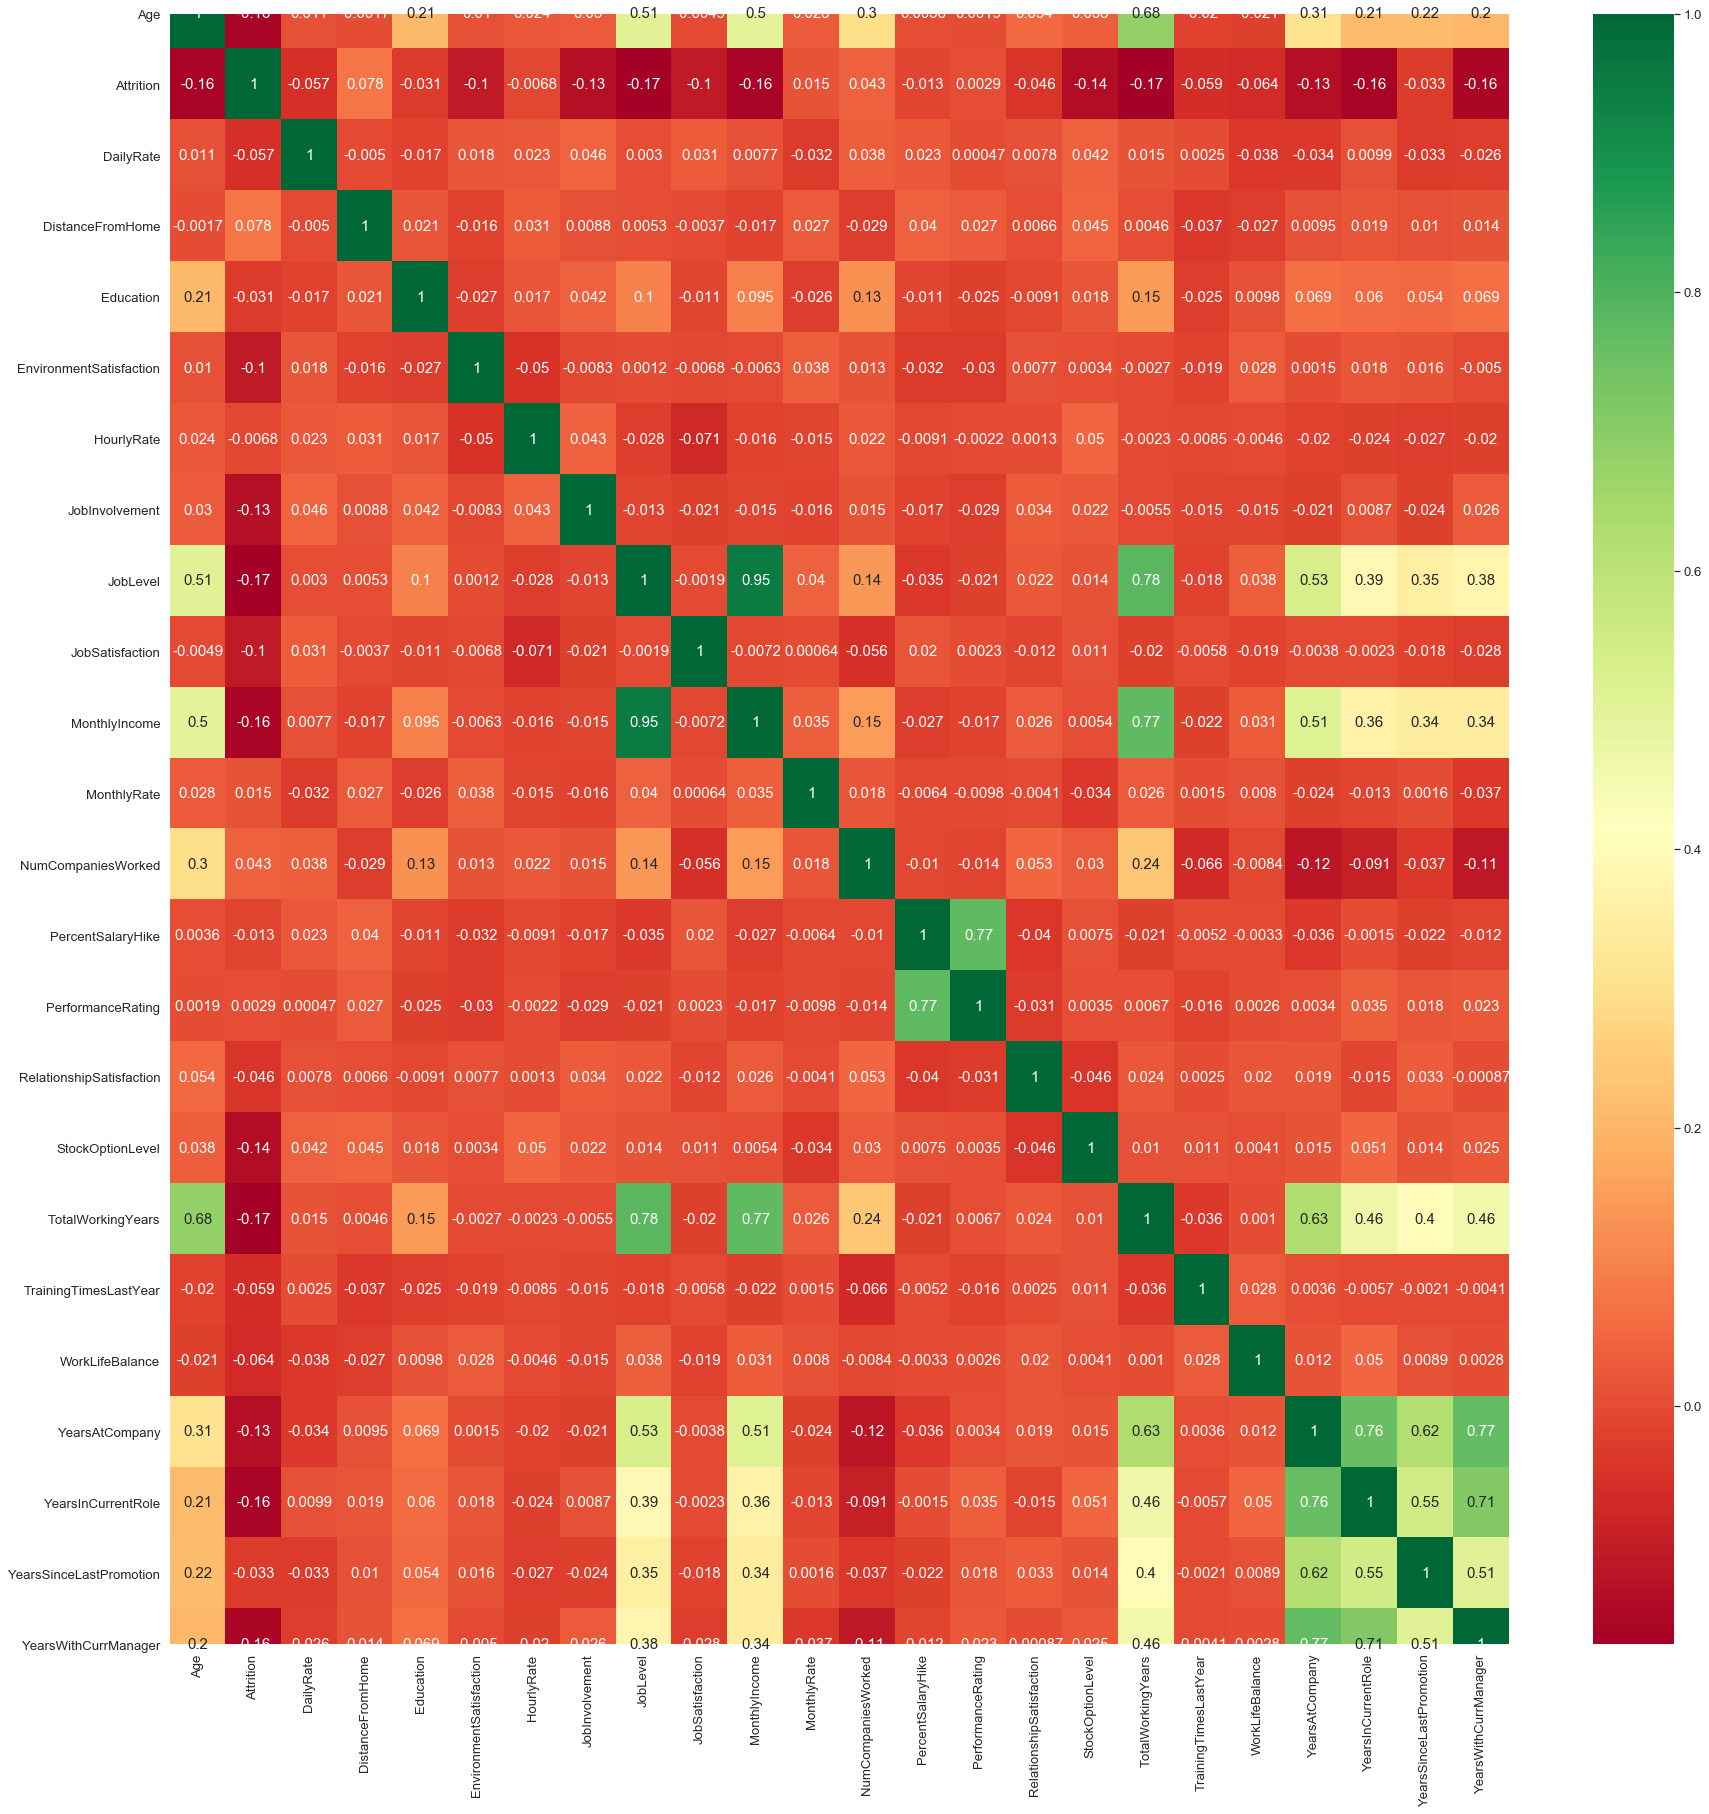

In [10]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# 4. Data Processing

In [11]:
# Transform categorical data into dummies
categorical_col.remove("Attrition")
data = pd.get_dummies(df, columns=categorical_col)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int8
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             14

# 5. Applying machine learning algorithms

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = data.drop("Attrition", axis="columns")
y = data.Attrition

log_reg = LogisticRegression(solver='liblinear')
score = cross_val_score(log_reg, X, y, cv=10)
score.mean()

0.8755068669452232

## 5. 1. Support Vector Regressor

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

X = data.drop("Attrition", axis="columns")
y = data.Attrition

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear', gamma='auto', C=1.0)
pipeline = Pipeline([("svm_model", SVC(kernel='linear', gamma='auto', C=1.0))])
params = {"svm_model__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "svm_model__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "svm_model__kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring="accuracy", iid=True)

In [14]:
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:   48.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('svm_model',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid=True, n_jobs=-1,
             param_grid={'svm_model__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'svm_model__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                            

In [15]:
y_train_pred = svm_grid.predict(X_train)
y_test_pred = svm_grid.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 0.9008746355685131
=>Confusion Matrix :
[[844   9]
 [ 93  83]]
=========test data============ :
Accuracy Score 0.8888888888888888
=>Confusion Matrix :
[[375   5]
 [ 44  17]]


## 5. 2. Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)), 
          }

X = data.drop("Attrition", axis="columns")
y = data.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [18]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 3204 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 6004 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 9604 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
   

In [19]:
y_train_pred = grid_search_cv.predict(X_train)
y_test_pred = grid_search_cv.predict(X_test)

In [20]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 0.8717201166180758
=>Confusion Matrix :
[[846   7]
 [125  51]]
=========test data============ :
Accuracy Score 0.8571428571428571
=>Confusion Matrix :
[[375   5]
 [ 58   3]]


## 5. 3. Bagging Classifier

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(base_estimator=model, n_estimators=100, bootstrap=True, 
                                   n_jobs=-1, oob_score=True, random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [22]:
y_train_pred = bag_clf.predict(X_train)
y_test_pred = bag_clf.predict(X_test)

In [23]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 1.0
=>Confusion Matrix :
[[853   0]
 [  0 176]]
=========test data============ :
Accuracy Score 0.8662131519274376
=>Confusion Matrix :
[[371   9]
 [ 50  11]]


## 5. 4. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)

In [25]:
grid_rand_forest.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'bootst

In [26]:
grid_rand_forest.best_estimator_.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

In [27]:
y_train_pred = grid_rand_forest.predict(X_train)
y_test_pred = grid_rand_forest.predict(X_test)

In [28]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 1.0
=>Confusion Matrix :
[[853   0]
 [  0 176]]
=========test data============ :
Accuracy Score 0.8662131519274376
=>Confusion Matrix :
[[374   6]
 [ 53   8]]


## 5. 5. Extra Tree Ensemble

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=1000)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

grid_rand_forest = GridSearchCV(xt_clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)

grid_rand_forest.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=1000, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'bootstrap': [True, False],
  

In [30]:
y_train_pred = grid_rand_forest.predict(X_train)
y_test_pred = grid_rand_forest.predict(X_test)

In [31]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 1.0
=>Confusion Matrix :
[[853   0]
 [  0 176]]
=========test data============ :
Accuracy Score 0.873015873015873
=>Confusion Matrix :
[[378   2]
 [ 54   7]]


## 5. 6. AdaBoost / Adaptative Boosting 

In [32]:
from sklearn.ensemble import AdaBoostClassifier

rand_frst_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=3,
                                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                                       warm_start=False)

ada_clf = AdaBoostClassifier(rand_frst_clf, n_estimators=1000)

In [33]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=3,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=1000,
                       

In [34]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [35]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 1.0
=>Confusion Matrix :
[[853   0]
 [  0 176]]
=========test data============ :
Accuracy Score 0.8662131519274376
=>Confusion Matrix :
[[377   3]
 [ 56   5]]


## 5. 7. Gradient Boosting Machine (GBM)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
y_train_pred = gbm_clf.predict(X_train)
y_test_pred = gbm_clf.predict(X_test)

In [38]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 0.9611273080660836
=>Confusion Matrix :
[[853   0]
 [ 40 136]]
=========test data============ :
Accuracy Score 0.8752834467120182
=>Confusion Matrix :
[[368  12]
 [ 43  18]]


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {"loss":["deviance"], "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              "min_samples_split": np.linspace(0.1, 0.5, 12), "min_samples_leaf": np.linspace(0.1, 0.5, 12),
              "max_depth":[3,5,8], "max_features":["log2","sqrt"], "criterion": ["friedman_mse",  "mae"],
              "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0], "n_estimators":[10]}

gbm_clf = GradientBoostingClassifier()
clf = GridSearchCV(gbm_clf, parameters, cv=10, n_jobs=-1, iid=True)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
 

In [40]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [41]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 0.8522837706511176
=>Confusion Matrix :
[[849   4]
 [148  28]]
=========test data============ :
Accuracy Score 0.8662131519274376
=>Confusion Matrix :
[[379   1]
 [ 58   3]]


| Classifier | SVM | Decision Tree | Bagging | Random Forest | Extra-Trees | AdaBoost | Gradient Boosting |
|:-|:-|:- |:- |:- |:- |:-|:-| 
| Train accuracy score | 0.9008 | 0.8717 | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 0.9611 |
| Test accuracy score | 0.8888 | 0.8571 | 0.8662 | 0.8662 | 0.8730 | 0.8639 | 0.8752 |
